## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 7.9: map of integrated CS J=2-1 emission in a star-forming clump in the Rosette molecular cloud

#### from observations taken with the IRAM 30m telescope by the author in 2003
#### infrared data are from the UKIRT Infrared Deep Sky Survey public release (http://wsa.roe.ac.uk/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import (ImageNormalize, SqrtStretch, LogStretch, AsinhStretch)
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
import reproject
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

[90.17999999997528, -90.18000000002644, -70.20000000000266, 70.19999999999946]


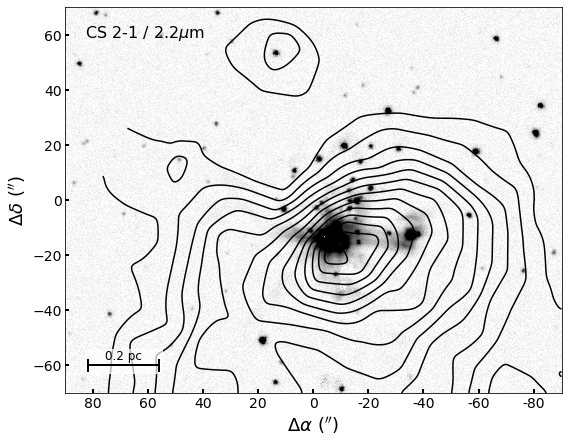

In [2]:
fig = plt.figure(figsize=(8, 6.5))
ax = fig.add_subplot(111)

# resample galactic CS to equatorial K band
hdu1 = fits.open('rosette_clump_UKIDSS_K.fits')[0]
hd1 = hdu1.header
hdu2 = fits.open('rosette_clump_IRAM_CS21.fits')[0]

cs, footprint = reproject.reproject_adaptive(hdu2, hd1)
ir = hdu1.data

nx, x0, dx, i0 = hd1['naxis1'], hd1['crval1'], hd1['cdelt1'], hd1['crpix1']
ny, y0, dy, j0 = hd1['naxis2'], hd1['crval2'], hd1['cdelt2'], hd1['crpix2']

# manual crop
imin, imax = 248, 749
jmin, jmax = 345, 735
xmin, xmax = x0+(imax-i0)*dx, x0+(imin-i0)*dx
ymin, ymax = y0+(jmin-j0)*dy, y0+(jmax-j0)*dy

xcen = (xmin+xmax)/2
ycen = (ymin+ymax)/2
xmin, xmax = 3600*(xmin-xcen), 3600*(xmax-xcen)
ymin, ymax = 3600*(ymin-ycen), 3600*(ymax-ycen)
extent = [xmax, xmin, ymin, ymax]
#print(extent)

ir_crop = ir[jmin:jmax, imin:imax]
cs_crop = cs[jmin:jmax, imin:imax]

#print(ir_crop.min(), ir_crop.max())
#print(np.nanmin(cs_crop), np.nanmax(cs_crop))
levs = np.arange(1,8,0.5)

# plot K band image in reverse
norm = ImageNormalize(ir, stretch=AsinhStretch(0.3))
ax.imshow(ir_crop, cmap='gray_r', vmin=2650, vmax=3650, origin='lower', norm=norm, extent=extent)

# lightly smooth CS contours to improve SNR and visual appearance
#ax.contour(cs_crop, levels=levs, colors='black', extent=extent)
ax.contour(gaussian_filter(cs_crop,3), levels=levs, colors='black', extent=extent)

ax.tick_params(direction='in', length=4, width=2, colors='black', labelcolor='black', labelsize=14)
x_labels = ['-80','-60','-40','-20', '0', '20', '40', '60', '80']
x_loc = np.array([float(x) for x in x_labels])
ax.set_xticks(x_loc)
ax.set_xticklabels(x_labels)

ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xlabel(r"$\Delta\alpha\ ('')$", fontsize=18)
ax.set_ylabel(r"$\Delta\delta\ ('')$", fontsize=18)
ax.text(0.04,0.92, r'CS 2-1 / 2.2$\mu$m', {'color': 'black', 'fontsize': 16}, transform=ax.transAxes)

# 0.2 pc = 26 arcsec at 1600 pc
xbar1 = 82
xbar2 = xbar1 - 26
ybar = -60
ax.fill([xbar1+1,xbar2-1,xbar2-1,xbar1+1], [ybar-3,ybar-3,ybar+6,ybar+6], color='white', alpha=0.7, zorder=99)
ax.plot([xbar1,xbar2], [ybar, ybar], lw=2, color='black', zorder=100)
ax.plot([xbar1,xbar1], [ybar-2, ybar+2], lw=2, color='black', zorder=100)
ax.plot([xbar2,xbar2], [ybar-2, ybar+2], lw=2, color='black', zorder=100)
ax.text(0.5*(xbar1+xbar2), ybar+2, '0.2 pc', ha='center', color='black', fontsize=12, zorder=100)

plt.tight_layout()
plt.savefig('rosette_clump.pdf')